<a href="https://colab.research.google.com/github/Marco10292/Freed-Kamaiya-Nutrition-Project/blob/main/Freed_Kamaiya_nutrition_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Freed-Kamaiya nutrition project

Data has been taken from the Master's Thesis "Comparative Study: Assessing nutrient intake adequacy and determinants of eating behaviours across communities in Bardiya District, Nepal".

A preliminary analysis and visualization has been done with Excel.
1. I located the two target variables, **'MDDW'** (Minimum Dietary Diversity of Women score, goes from 0 to 10) and **'GLOBADEQUACY'** (a percentage that indicates how much all nutrients' intakes are covered, where 100% = perfect coverage) and established a clear correlation between the two variables.

2. Then, I took a look at the variable **'MK'** that indicates the status of simil-slavery (Mukta-Kamaiya) that could or not worsen of the nutrient intake adequacy of the individual pregnant women. Indeed, distribution of MDDW and GLOBADEQUACY between MK0 (non-Mukta-Kamaiya) and MK1 (Mukta-Kamaiya), is clearly unbalanced in favour of the firsts.

3. Finally, I performed a general analysis in the dispersion of the 'nutrients' variables, also locating outliers, which are very limited in number.

## What am I gonna do in here?

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

URL = 'https://raw.githubusercontent.com/Marco10292/GENERALE/main/Freed-Kamaiya%20nutrition%20project.xlsx'
df = pd.read_excel(URL, sheet_name='General data')
print(f"Number of rows and column in the Dataset is {df.shape}")
df.head(5)

Number of rows and column in the Dataset is (61, 53)


,NAME,MK,MDDW,GLOBADEQUACY,AGE,FIES,EDUCATION,WEALTH,INCOME,SIZE,...,Grains,Pulses,Nuts,Dairy,Meat,Eggs,Dark,VITA2,Veg,Fruit
0,Srijana Aryal,0,4,0.614474,30,1,2,11,13500,2,...,1,1,0,1,0,0,0,0,1,0
1,Asumita Sharma,0,6,0.788263,21,5,3,15,25000,10,...,1,1,0,0,0,1,0,1,1,1
2,Melna Kumari Tharu,1,7,0.547158,27,1,2,11,15000,5,...,1,1,0,1,1,0,0,1,1,1
3,Maduri Raidas,0,2,0.296316,19,3,0,7,32500,8,...,1,0,0,0,0,0,0,0,1,0
4,Samjhana Chaudhary,1,4,0.574053,19,5,2,12,10000,5,...,1,1,0,1,0,0,0,0,0,1


In [ ]:
df.columns
# Exclude columns from 'FAT' to 'Fruit'
columns_to_exclude = df.loc[:, 'FAT':'Fruit'].columns  # Select columns from 'FAT' to 'Fruit'
df_filtered = df.drop(columns=columns_to_exclude)  # Drop these columns

# Verify the updated dataset
print(f"Number of rows and columns in the filtered Dataset is {df_filtered.shape}")
df_filtered

Number of rows and columns in the filtered Dataset is (61, 20)


,NAME,MK,MDDW,GLOBADEQUACY,AGE,FIES,EDUCATION,WEALTH,INCOME,SIZE,TIMEOWN,NUMANIM,NUMCROP,EMPLOY,DECISION,FOODYN,INCALL,NUMPEOPLE,UNDER,ENERGY
0,Srijana Aryal,0,4,0.614474,30,1,2,11,13500,2,15,7,5,0,1,11,12.346,8,0,0.658
1,Asumita Sharma,0,6,0.788263,21,5,3,15,25000,10,24,13,2,0,1,10,4.286,8,0,1.101
2,Melna Kumari Tharu,1,7,0.547158,27,1,2,11,15000,5,35,10,5,0,1,10,10.000,5,0,0.531
3,Maduri Raidas,0,2,0.296316,19,3,0,7,32500,8,7,5,4,0,1,9,7.692,5,0,0.346
4,Samjhana Chaudhary,1,4,0.574053,19,5,2,12,10000,5,20,31,6,0,1,9,8.333,4,0,0.857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Pamfa Sunar,0,3,0.882947,24,5,2,11,30000,55,40,10,6,0,1,4,1.667,8,0,0.784
57,Manisha Chaudhary,1,4,0.800632,23,1,2,14,15000,0,0,22,2,0,1,4,15.556,6,1,1.621
58,Aasha Kumari Tharu,1,5,0.812211,24,1,1,8,30000,12,90,17,3,0,3,3,4.167,2,0,1.262
59,Kabita Chanlagain,0,8,0.996105,32,1,3,34,30000,40,30,5,6,0,1,3,4.167,7,0,1.418


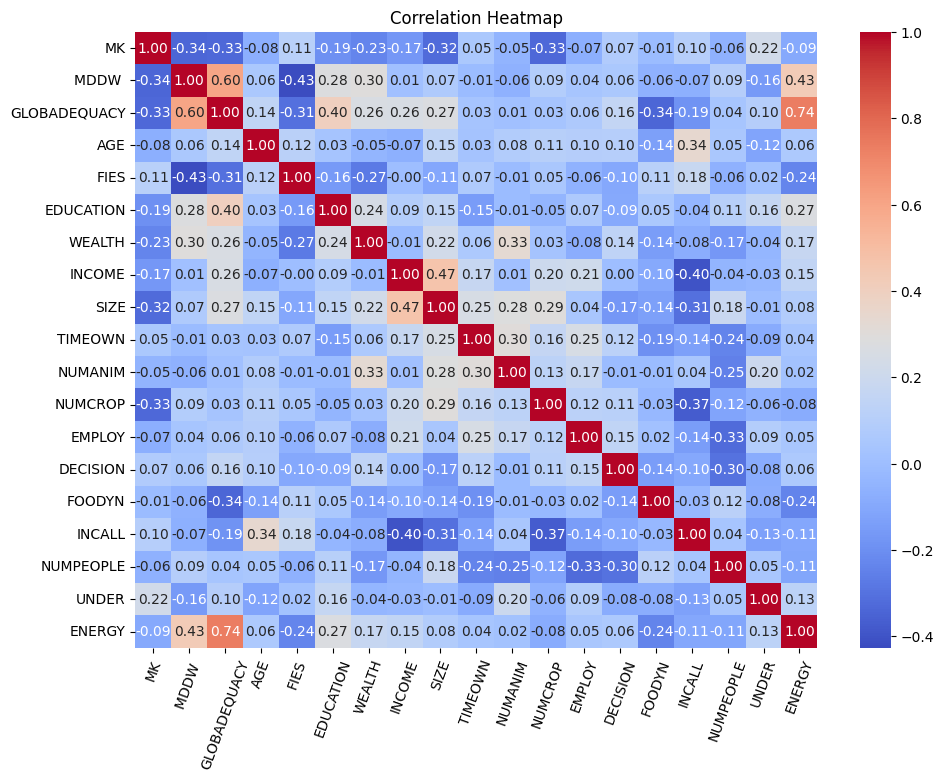

In [ ]:
df_filtered = df_filtered.select_dtypes(include=['number'])
correlation_matrix = df_filtered.corr()
plt.figure(figsize=(11, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")  # Annotate with values with 2 decimal places
plt.xticks(rotation=70)  # Rotate x-axis labels for better readability
plt.tick_params(labelsize=10)  # Increase font size of axis labels
plt.title("Correlation Heatmap")
plt.show()

The **heathmap** displays levels of correlation, which go from -1 to +1, between single variables, where +1 is maximum positive correlation.
This offers a limited insight, but is very useful to locate the most interesting variables' correlations for further analysis.

I already demonstrated in the previous part of the project, that **MK1** is *significantly worse off* in the key nutritional variables of GLOBADEQUACY and MDDW.

Here, we can easily see the negative correlation between MK0 and size of land owned and number of types of plants they grow.

NOTE: We should remember that **correlation does not imply causation.** A correlation between "MK" and another variable simply means that the two variables tend to vary together, but it doesn't necessarily mean that one causes the other.


##**Nutrient Adequacy Categorization**

#Clustering

After careful consideration, I decided to perform **Clustering** regardless the limited number of inidividuals (61) instead of performing manual classification, since Clustering can provide an alternative perspective, grouping individuals based on multiple variables rather than pre-existing categories like MK. Moreover, I think it may be interesting to interpret graphically and to showcase my ability with performing such a task.

That being said, I should employ it mainly as an **exploratory tool**, use maximum **2-3 clusters** not to overcomplicate the analysis and focus on variables that are important, such as MDDW, GLOBADEQUACY, INCOME and WEALTH.

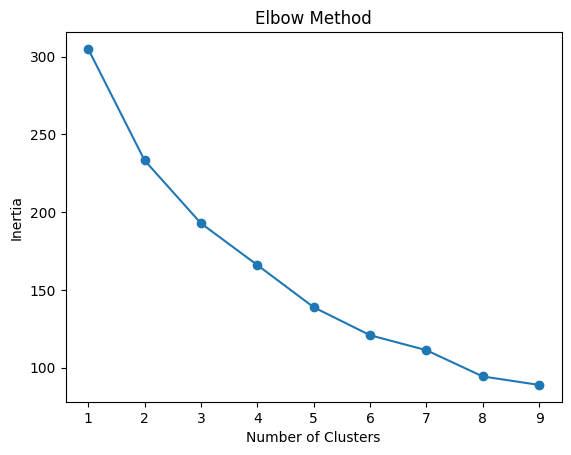

In [ ]:
# Determining variables for clusters
clustering_data = df_filtered[['MDDW ', 'GLOBADEQUACY', 'INCOME', 'WEALTH', 'NUMPEOPLE']]
clustering_data = clustering_data.dropna()
# Standardizing
scaler = StandardScaler()
clustering_data_s = scaler.fit_transform(clustering_data)

#Here I am using the elbow method to see optimal number of clusters
inertia=[]
for k in range(1,10):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(clustering_data_s)
  inertia.append(kmeans.inertia_)


plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


Given my reluctance on adopting too many clusters, I try to perform **silhouette score**, whom higher value tells me a better clusters' separation.
The silhouette score slightly increases from k=3 to k=4, but all values are close, suggesting that the difference in cluster quality is minimal between 3 and 4 clusters.

In [ ]:
silhouette_scores = []
for k in range(2, 5):  # Start with 2 to avoid a single cluster
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(clustering_data_s)
    score = silhouette_score(clustering_data_s, labels)
    silhouette_scores.append(score)

print(silhouette_scores)


[0.21250853043581763, 0.23701674031180706, 0.201952925801713]


In [ ]:
# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df_filtered['Cluster'] = kmeans.fit_predict(clustering_data_s)
# Here I visualize averaged variables across clusters
cluster_summary = df_filtered.groupby('Cluster').mean()
cluster_summary
df_filtered


,MK,MDDW,GLOBADEQUACY,AGE,FIES,EDUCATION,WEALTH,INCOME,SIZE,TIMEOWN,NUMANIM,NUMCROP,EMPLOY,DECISION,FOODYN,INCALL,NUMPEOPLE,UNDER,ENERGY,Cluster
0,0,4,0.614474,30,1,2,11,13500,2,15,7,5,0,1,11,12.346,8,0,0.658,0
1,0,6,0.788263,21,5,3,15,25000,10,24,13,2,0,1,10,4.286,8,0,1.101,0
2,1,7,0.547158,27,1,2,11,15000,5,35,10,5,0,1,10,10.000,5,0,0.531,0
3,0,2,0.296316,19,3,0,7,32500,8,7,5,4,0,1,9,7.692,5,0,0.346,2
4,1,4,0.574053,19,5,2,12,10000,5,20,31,6,0,1,9,8.333,4,0,0.857,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0,3,0.882947,24,5,2,11,30000,55,40,10,6,0,1,4,1.667,8,0,0.784,0
57,1,4,0.800632,23,1,2,14,15000,0,0,22,2,0,1,4,15.556,6,1,1.621,0
58,1,5,0.812211,24,1,1,8,30000,12,90,17,3,0,3,3,4.167,2,0,1.262,0
59,0,8,0.996105,32,1,3,34,30000,40,30,5,6,0,1,3,4.167,7,0,1.418,0


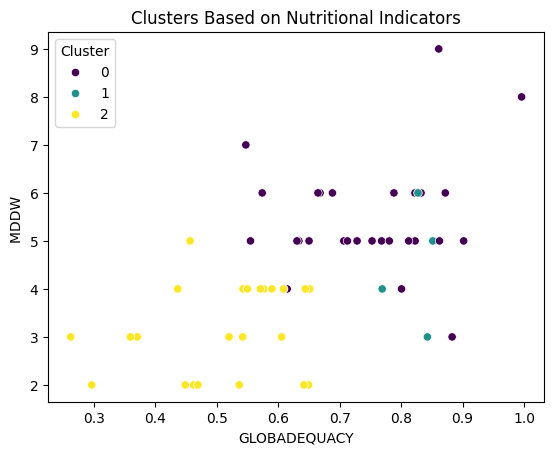

In [ ]:
sns.scatterplot(x=df_filtered['GLOBADEQUACY'], y=df_filtered['MDDW '], hue=df_filtered['Cluster'], palette='viridis')
plt.title('Clusters Based on Nutritional Indicators')
plt.show()

In [ ]:
cluster_mk_distribution = pd.crosstab(df_filtered['Cluster'], df_filtered['MK'])
print(cluster_mk_distribution)

MK        0   1
Cluster        
0        20  10
1         3   1
2         8  19


Now, I am developing **3 hypothesis** to interpret the Clustering division!

**H1**:*Individuals in clusters with higher GLOBADEQUACY scores also have higher MDDW scores.*

**H2**:*Individuals in clusters with lower GLOBADEQUACY scores (e.g., Cluster 1) are more likely to have lower income and education levels.*

**H3**:*Cluster 2 individuals (with the highest GLOBADEQUACY) have higher access to food sources and resources (e.g., WEALTH, TIMEOWN, NUMCROP).*

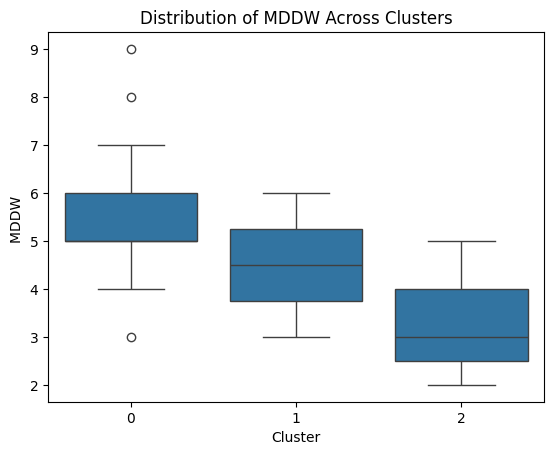

F-statistic: 29.730131090114376, P-value: 1.2959069011020029e-09


In [ ]:
## H1
df_filtered.groupby('Cluster')[['GLOBADEQUACY', 'MDDW ']].mean()
sns.boxplot(x='Cluster', y='MDDW ', data=df_filtered)
plt.title('Distribution of MDDW Across Clusters')
plt.show()
# ANOVA test

cluster_0 = df_filtered[df_filtered['Cluster'] == 0]['MDDW ']
cluster_1 = df_filtered[df_filtered['Cluster'] == 1]['MDDW ']
cluster_2 = df_filtered[df_filtered['Cluster'] == 2]['MDDW ']

f_stat, p_value = f_oneway(cluster_0, cluster_1, cluster_2)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

INCOME - F-statistic: 54.45844284839133, P-value: 4.8629957777042884e-14
EDUCATION - F-statistic: 1.856107330426508, P-value: 0.16544322225867647
                INCOME  EDUCATION
Cluster                          
0         27383.333333   2.233333
1        130000.000000   2.500000
2         25203.703704   1.962963
int64


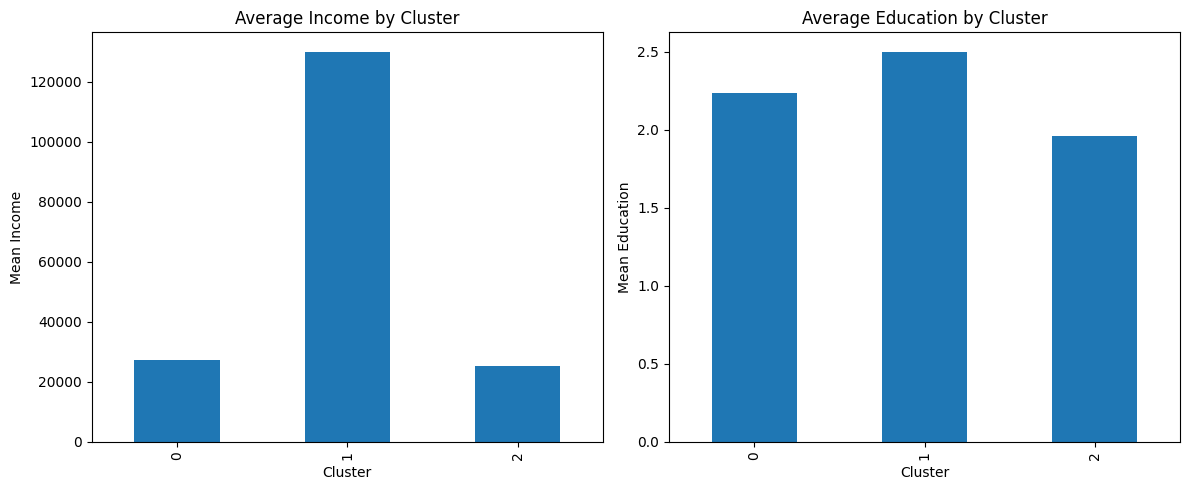

In [ ]:
# H2
df_filtered.groupby('Cluster')[['INCOME', 'EDUCATION']].mean()

income_cluster_0 = df_filtered[df_filtered['Cluster'] == 0]['INCOME']
income_cluster_1 = df_filtered[df_filtered['Cluster'] == 1]['INCOME']
income_cluster_2 = df_filtered[df_filtered['Cluster'] == 2]['INCOME']

f_stat_income, p_value_income = f_oneway(income_cluster_0, income_cluster_1, income_cluster_2)
print(f"INCOME - F-statistic: {f_stat_income}, P-value: {p_value_income}")

education_cluster_0 = df_filtered[df_filtered['Cluster'] == 0]['EDUCATION']
education_cluster_1 = df_filtered[df_filtered['Cluster'] == 1]['EDUCATION']
education_cluster_2 = df_filtered[df_filtered['Cluster'] == 2]['EDUCATION']

f_stat_edu, p_value_edu = f_oneway(education_cluster_0, education_cluster_1, education_cluster_2)
print(f"EDUCATION - F-statistic: {f_stat_edu}, P-value: {p_value_edu}")

print(df_filtered.groupby('Cluster')[['INCOME', 'EDUCATION']].mean())
print(df_filtered['EDUCATION'].dtype)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Create a figure with 2 subplots

# Subplot 1: Income
df_filtered.groupby('Cluster')['INCOME'].mean().plot(kind='bar', ax=axes[0])
axes[0].set_title('Average Income by Cluster')
axes[0].set_ylabel('Mean Income')

# Subplot 2: Education
df_filtered.groupby('Cluster')['EDUCATION'].mean().plot(kind='bar', ax=axes[1])
axes[1].set_title('Average Education by Cluster')
axes[1].set_ylabel('Mean Education')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

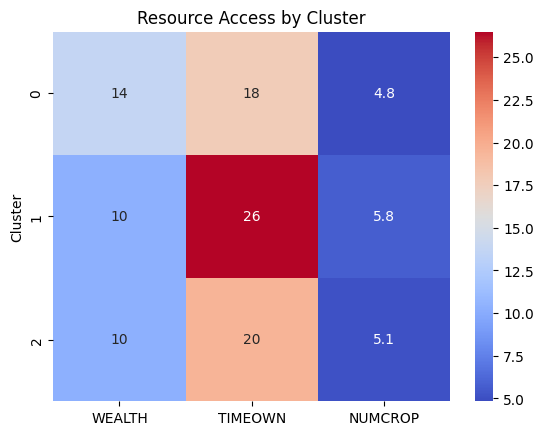

WEALTH - F-statistic: 1.9668150342247543, P-value: 0.14912219144276426


In [ ]:
# H3
df_filtered.groupby('Cluster')[['WEALTH', 'TIMEOWN', 'NUMCROP']].mean()
sns.heatmap(df_filtered.groupby('Cluster')[['WEALTH', 'TIMEOWN', 'NUMCROP']].mean(), annot=True, cmap='coolwarm')
plt.title('Resource Access by Cluster')
plt.show()
wealth_cluster_0 = df_filtered[df_filtered['Cluster'] == 0]['WEALTH']
wealth_cluster_1 = df_filtered[df_filtered['Cluster'] == 1]['WEALTH']
wealth_cluster_2 = df_filtered[df_filtered['Cluster'] == 2]['WEALTH']

f_stat_wealth, p_value_wealth = f_oneway(wealth_cluster_0, wealth_cluster_1, wealth_cluster_2)
print(f"WEALTH - F-statistic: {f_stat_wealth}, P-value: {p_value_wealth}")

#Clustering results:
**H1**: Individuals in clusters with higher GLOBADEQUACY scores also have higher MDDW scores.

     Result: F-statistic: 29.730131090114376, P-value: 1.2959069011020029e-09
     The F-statistic indicates the strength of the evidence for rejecting the null hypothesis (all cluster means are equal):
     a high F-statistic suggests that the means are likely different.
     Moreover, the p-value represents the probability of observing such a large F-statistic if the null hypothesis were true.
     A very low p-value (typically less than 0.05) suggests that the observed differences in means are statistically significant.

Here, the p-value is highly significant (less than 0.05), which means we can reject the null hypothesis and conclude that **there is a statistically significant difference in MDDW scores between the clusters.**


**H2**: *Individuals in clusters with lower GLOBADEQUACY scores (e.g., Cluster 1) are more likely to have lower income and education levels.*

     INCOME - F-statistic: 54.45844284839133, P-value: 4.8629957777042884e-14
     EDUCATION - F-statistic: 1.856107330426508, P-value: 0.16544322225867647
     The hypothesis is partially supported:
     Income levels differ significantly across clusters, with Cluster 1 having lower education levels, consistent with H2.
     Education levels do not show significant differences, so the hypothesis is not supported for education.
**This suggests that lower GLOBADEQUACY scores may be more strongly associated with lower income levels rather than education levels.**


**H3**:*Cluster 2 individuals (with the highest GLOBADEQUACY) have higher access to food sources and resources (e.g., WEALTH, TIMEOWN, NUMCROP).*

     WEALTH - F-statistic: 1.9668150342247543, P-value: 0.14912219144276426
     This high F-statistic indicates a significant difference in the mean wealth across the three clusters.    
     This extremely low p-value (much less than the typical significance level of 0.05) strongly suggests that the observed differences in mean wealth across the clusters are statistically significant.
     In other words, it is highly unlikely that these differences occurred by chance.

These findings suggest **potential socioeconomic disparities between the clusters**. Cluster 2 might represent households with better economic conditions, while Cluster 0 might represent households with more limited resources.


## Considerations on Wealth and Education

In the original analysis, the wealth of individual women is obviously especially interesting and important, even if linked with the ultiumate 'goal': to be well fed (in this case linked with 'MDDW' and 'GLOBADEQUACY').                       
 Education is similarly important, and from clustering analysis, it seems it could be more influencial than income on the quality of nutrition!

#Wealth
**Role of Wealth in Alimentation**
Wealth is represented by the following variables:

WEALTH: made of arable land size per capita, herds per capita and income per capita.

INCOME: Household income.

SIZE: Size of land owned.

NUMANIM: Number of animals owned.

NUMPEOPLE: Household size (interpreted negatively, as larger households dilute wealth).

*Hypothesis*
**H1:** Higher wealth contributes positively to better alimentation outcomes (higher MDDW and GLOBADEQUACY).

In [ ]:
# Define predictors and response
X = df_filtered[['WEALTH', 'TIMEOWN', 'NUMCROP']]
y = df_filtered['MDDW ']
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Fit the model using sklearn
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Model 1 - Predicting MDDW using Wealth Indicators")
print("R-squared:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Fit the model using statsmodels for detailed output
X_train_sm = sm.add_constant(X_train)  # Add constant for intercept
ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())

Model 1 - Predicting MDDW using Wealth Indicators
R-squared: 0.059048008034425004
Mean Squared Error: 3.497943416115794
                            OLS Regression Results                            
Dep. Variable:                  MDDW    R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.069
Method:                 Least Squares   F-statistic:                    0.1134
Date:                Thu, 16 Jan 2025   Prob (F-statistic):              0.952
Time:                        20:37:55   Log-Likelihood:                -67.360
No. Observations:                  42   AIC:                             142.7
Df Residuals:                      38   BIC:                             149.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

In [ ]:
# Step 1: Data Preparation
# Select relevant columns
variables = ['MDDW ', 'GLOBADEQUACY', 'EDUCATION', 'DECISION', 'FOODYN']
df_model = df_filtered[variables].dropna()  # Adjust column name

# Standardize predictors
scaler = StandardScaler()
df_model[['EDUCATION', 'DECISION', 'FOODYN']] = scaler.fit_transform(df_model[['EDUCATION', 'DECISION', 'FOODYN']])

# Model 3: Predicting MDDW
X_mddw = df_model[['EDUCATION', 'DECISION', 'FOODYN']]
y_mddw = df_model['MDDW ']
X_mddw = sm.add_constant(X_mddw)  # Add intercept
model_mddw = sm.OLS(y_mddw, X_mddw).fit()

# Model 4: Predicting GLOBADEQUACY
X_glob = df_model[['EDUCATION', 'DECISION', 'FOODYN']]
y_glob = df_model['GLOBADEQUACY']
X_glob = sm.add_constant(X_glob)  # Add intercept
model_glob = sm.OLS(y_glob, X_glob).fit()

# Step 2: Model Summaries
print("Model 3: Predicting MDDW Using Education and Decision-Making Variables")
print(model_mddw.summary())

print("\nModel 4: Predicting GLOBADEQUACY Using Education and Decision-Making Variables")
print(model_glob.summary())


Model 3: Predicting MDDW Using Education and Decision-Making Variables
                            OLS Regression Results                            
Dep. Variable:                  MDDW    R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     1.865
Date:                Thu, 16 Jan 2025   Prob (F-statistic):              0.146
Time:                        20:37:55   Log-Likelihood:                -107.42
No. Observations:                  61   AIC:                             222.8
Df Residuals:                      57   BIC:                             231.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

# Results:

Overall, it seems that only the last model has moderate predictive power, while the others have a low predictive value.

The choice for the variables to be utilized has been made after applying Random Forest and some exploratory and iterative analysis.
It seems that both MDDW and GLOBADEQUACY are, generally speaking, loosely linked with both wealth and education variables.

A possible exception is the GLOBADEQUACY variable if paired with 'education' variables, 'EDUCATION', 'DECISION', 'FOODYN', which shows decent results.

The choice to keep the few outliers located in the previous Excel analysis has been made after trying clustering without them, which gave slightly worst results.
